In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
stocks = px.data.stocks()
stocks.head()


,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


In [12]:
corr_df = stocks.corr()
corr_df

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
GOOG,1.000000,0.833629,0.556702,0.633169,0.140254,0.747029
AAPL,0.833629,1.000000,0.560877,0.493498,0.049519,0.786771
AMZN,0.556702,0.560877,1.000000,0.341430,0.619946,0.660896
FB,0.633169,0.493498,0.341430,1.000000,0.265663,0.472227
NFLX,0.140254,0.049519,0.619946,0.265663,1.000000,0.079532
MSFT,0.747029,0.786771,0.660896,0.472227,0.079532,1.000000


In [13]:
corr_df = corr_df.apply(lambda x: round(x, 2))
corr_df

,GOOG,AAPL,AMZN,FB,NFLX,MSFT
GOOG,1.00,0.83,0.56,0.63,0.14,0.75
AAPL,0.83,1.00,0.56,0.49,0.05,0.79
AMZN,0.56,0.56,1.00,0.34,0.62,0.66
FB,0.63,0.49,0.34,1.00,0.27,0.47
NFLX,0.14,0.05,0.62,0.27,1.00,0.08
MSFT,0.75,0.79,0.66,0.47,0.08,1.00


In [14]:
s = corr_df.unstack()
s

GOOG  GOOG    1.00
      AAPL    0.83
      AMZN    0.56
      FB      0.63
      NFLX    0.14
      MSFT    0.75
AAPL  GOOG    0.83
      AAPL    1.00
      AMZN    0.56
      FB      0.49
      NFLX    0.05
      MSFT    0.79
AMZN  GOOG    0.56
      AAPL    0.56
      AMZN    1.00
      FB      0.34
      NFLX    0.62
      MSFT    0.66
FB    GOOG    0.63
      AAPL    0.49
      AMZN    0.34
      FB      1.00
      NFLX    0.27
      MSFT    0.47
NFLX  GOOG    0.14
      AAPL    0.05
      AMZN    0.62
      FB      0.27
      NFLX    1.00
      MSFT    0.08
MSFT  GOOG    0.75
      AAPL    0.79
      AMZN    0.66
      FB      0.47
      NFLX    0.08
      MSFT    1.00
dtype: float64

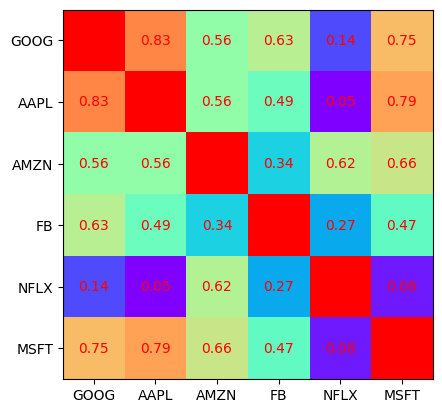

In [17]:
fig, ax = plt.subplots()
im = ax.imshow(corr_df, cmap='rainbow')

ax.set_xticks(np.arange(len(corr_df.columns)))
ax.set_yticks(np.arange(len(corr_df.index)))

ax.set_xticklabels(corr_df.columns)
ax.set_yticklabels(corr_df.columns)

for x in range(len(corr_df.columns)):
    for y in range(len(corr_df.index)):
        ax.text(y, x, corr_df.iloc[y,x], ha='center', va='center', color='r')
        
plt.show()

In [18]:
fig.savefig('2023-08-08.png', dpi=300)

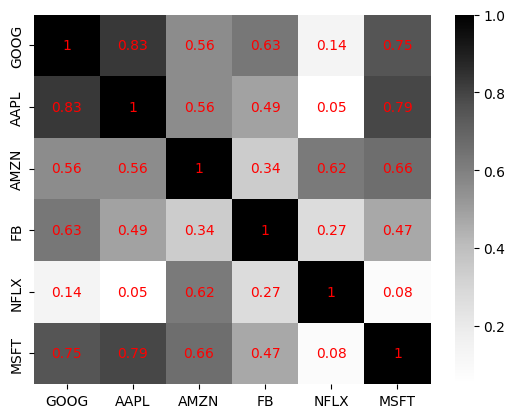

In [21]:
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='r'), cmap='Greys')
plt.show()